/var/folders/z2/x7j4rzyx2c7bdjp40rd5l0hm0000gn/T/ipykernel_85042/2610812448.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


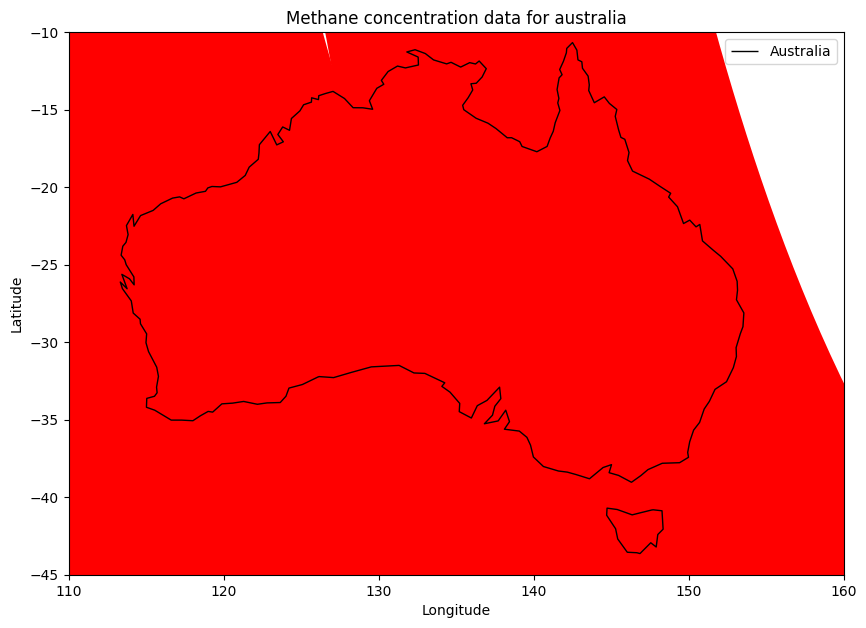

In [4]:

from sentinelsat import SentinelAPI
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == 'Australia']

api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True, timeout=60)

data_date = (date(2023, 4, 7), date(2023, 5, 30))
product_type = "L2__CH4___"
kw = 28627, 28628
# Query data
result = api.query(date=data_date, producttype=product_type, orbitnumber=kw)
product_ids = list(result.keys())

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)




# Plot the data on a map of Australia
fig, ax = plt.subplots(figsize=(10, 10))
australia.boundary.plot(ax=ax, linewidth=1, color='black')
result_gdf.plot(ax=ax, color='red', markersize=10)


ax.set_title('Map of Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([110, 160]) 
ax.set_ylim([-45, -10])  

plt.title("Methane concentration data for australia")
plt.legend(["Australia", "Methane Concentration"])
plt.show()


